<a href="https://colab.research.google.com/github/diyoraiword/air-price-prediction/blob/main/neurol_network_model_development_for_air_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import copy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('/content/train_data.csv (3) (1) (1).zip')
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
encoder = OrdinalEncoder()
text = data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)

ready data set to develop a model

first, just a model without any development

In [ ]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


split data set in train and test sets

In [ ]:
drop = ['id', 'price']
x = data.drop(drop, axis=1)
y = data['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 10)
x_test = (8000, 10)
y_train = (12000,)
y_test = (8000,)


In [ ]:
model = Sequential(
    [
        Dense(140, activation='relu', name='l1'),
        Dense(40, activation='relu', name='l2'),
        Dense(1, activation='linear', name='l3')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train, y_train, 
    epochs=100
)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 590646976.0000
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 467970080.0000
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 465834816.0000
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 462988192.0000
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 457770048.0000
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 452526880.0000
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 446989344.0000
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 440728320.0000
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 433586080.0000
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 426808960.0000
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 419444512.0000
Epoch 12

In [ ]:
yhat_tr = model.predict(x_train)
mse_tr  = mean_squared_error(y_train, yhat_tr)
print(f'training error {np.sqrt(mse_tr)}')

yhat_te = model.predict(x_test)
mse_te = mean_squared_error(y_test, yhat_te)
print(f'test error {np.sqrt(mse_te)}')

375/375 [==============================] - 0s 1ms/step
training error 6042.658076228983
125/125 [==============================] - 0s 1ms/step
test error 5848.068194305352


out model is not good .
let's develop the model by different ways

development of the model by scaling

In [ ]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


first of all, I have splited the data in three groups training set, cross validation set and test set

In [ ]:
drop_col = ['id', 'price']

x = data.drop(drop, axis=1)
y = data[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv , x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f'train x = {x_train.shape}')
print(f'train y = {y_train.shape}')
print(f'cv x = {x_cv.shape}')
print(f'cv y = {y_cv.shape}')
print(f'test x = {x_test.shape}')
print(f'test y = {y_test.shape}')

train x = (12000, 10)
train y = (12000, 1)
cv x = (4000, 10)
cv y = (4000, 1)
test x = (4000, 10)
test y = (4000, 1)


scaling 

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.fit_transform(x_cv)

In [ ]:
model= Sequential(
    [
        Dense(140, activation='relu', name='l1'),
        Dense(40, activation='relu', name='l2'),
        Dense(1, activation='linear', name='l3')
        ]
    )  
  

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    )
  
model.fit(
    x_train_scaled, y_train,
    epochs = 100
    )

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 921294592.0000
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 587178816.0000
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 230585600.0000
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 99688864.0000
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 51499696.0000
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 42318172.0000
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 40954248.0000
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 40305340.0000
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 39707636.0000
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 39280788.0000
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 38800852.0000
Epoch 12/100
375

In [ ]:
yhat_train = model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, yhat_train)
print(f'train error afer scaling {np.sqrt(train_mse)}')

yhat_cv = model.predict(x_cv_scaled)
cv_error = mean_squared_error(y_cv, yhat_cv)
print(f'cv error after scaling {np.sqrt(cv_error)}')

375/375 [==============================] - 1s 2ms/step
train error afer scaling 5886.668345825393
125/125 [==============================] - 0s 2ms/step
cv error after scaling 5817.990664528486


scaling has imporved the model perfocmance

polynomial features

In [ ]:
train_err = []
cv_err = []

for i in range(1, 5):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = Sequential(
      [
          Dense(25, activation='relu', name='l1'),
          Dense(15,  activation='relu', name='l2'),
          Dense(1,   activation='relu', name='l3')
      ]
  )
  model.compile(
      loss = tf.keras.losses.MeanSquaredError(),
      optimizer = tf.keras.optimizers.Adam(0.00001)
  )
  model.fit(
      x_train_mapped, y_train,
      epochs=10
  )
  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 952325888.0000
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 952231360.0000
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 952133312.0000
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 952024064.0000
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 951902272.0000
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 951755200.0000
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 951573312.0000
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 951381888.0000
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 951177856.0000
Epoch 10/10
125/125 [==============================] - 0s 1ms/step
Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 579593280.0000
Epoch 2/10
375/375 [=======================

In [ ]:
print(train_err)
print(cv_err)

[30835.78305784562, 21873.02871095129, 31851.528493139696, 30860.16736655866]
[31111.42373026897, 21926.26763325956, 32356.948927817743, 31136.61985660442]


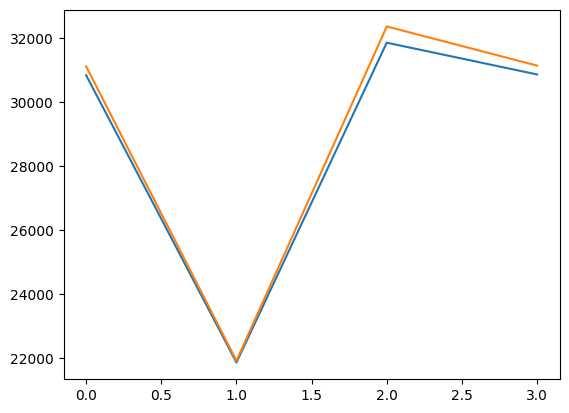

In [ ]:
plt.plot(train_err)
plt.plot(cv_err)
plt.show()

as you notice , degree 2 is the best choice

now, I apply regularization

In [ ]:
train_err = []
cv_err = []
reg = [0.001, 0.01, 0.1, 1, 10, 50]

for i in range(len(reg)):
  lambda_ = reg[i]
  poly = PolynomialFeatures(degree=2, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = Sequential(
      [
          Dense(25, activation='relu', name='l1', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
          Dense(15,  activation='relu', name='l2', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
          Dense(1,   activation='relu', name='l3', kernel_regularizer=tf.keras.regularizers.l2(lambda_))
      ]
  )
  model.compile(
      loss = tf.keras.losses.MeanSquaredError(),
      optimizer = tf.keras.optimizers.Adam(0.00001)
  )
  model.fit(
      x_train_mapped, y_train,
      epochs=10
  )
  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

Epoch 1/10
375/375 [==============================] - 3s 2ms/step - loss: 28730796032.0000
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 22339618816.0000
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 17256015872.0000
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 13217596416.0000
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 10011798528.0000
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 7478604288.0000
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 5495711232.0000
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 3967466496.0000
Epoch 9/10
375/375 [==============================] - 1s 3ms/step - loss: 2815976704.0000
Epoch 10/10
125/125 [==============================] - 0s 1ms/step
Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 533461952.0000
Epoch 2/10
375/375 [=========

In [ ]:
print(train_err)
print(cv_err)

[40484.81465285648, 21983.618868561345, 22566.89199785055, 22227.219975940796, 22052.4880367253, 30860.344808302667]
[40835.66538102639, 22056.047550621894, 22522.584465407796, 22211.68724572464, 22067.594540449987, 31136.294472604637]


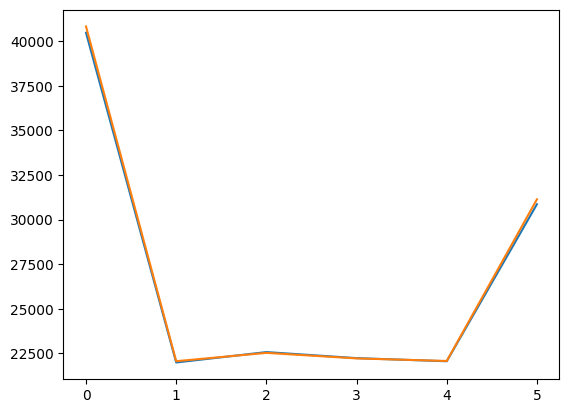

In [ ]:
plt.plot(train_err)
plt.plot(cv_err)
plt.show()

I have dicided to use 1 as a regularization parametr value

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.fit_transform(x_cv)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
scaler = StandardScaler()

x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled = scaler.fit_transform(x_cv_mapped)
x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [ ]:
model = Sequential(
    [
        Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(1), name='l1'),
        Dense(15, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(1), name='l2'),
        Dense(1, activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(1), name='l3')
    ]
)

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)

model.fit(
    x_train_mapped_scaled, y_train,
    epochs = 500
)

Epoch 1/500
375/375 [==============================] - 2s 2ms/step - loss: 952297344.0000
Epoch 2/500
375/375 [==============================] - 1s 2ms/step - loss: 952026944.0000
Epoch 3/500
375/375 [==============================] - 1s 2ms/step - loss: 951409728.0000
Epoch 4/500
375/375 [==============================] - 1s 2ms/step - loss: 950231296.0000
Epoch 5/500
375/375 [==============================] - 1s 2ms/step - loss: 948296384.0000
Epoch 6/500
375/375 [==============================] - 1s 2ms/step - loss: 945505280.0000
Epoch 7/500
375/375 [==============================] - 1s 2ms/step - loss: 941757504.0000
Epoch 8/500
375/375 [==============================] - 1s 2ms/step - loss: 937015232.0000
Epoch 9/500
375/375 [==============================] - 1s 2ms/step - loss: 931290048.0000
Epoch 10/500
375/375 [==============================] - 1s 2ms/step - loss: 924572864.0000
Epoch 11/500
375/375 [==============================] - 1s 2ms/step - loss: 916838912.0000
Epoch 12

In [ ]:
train_yhat = model.predict(x_train_mapped_scaled)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train set error {np.sqrt(train_mse)}')

test_yhat = model.predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

375/375 [==============================] - 1s 1ms/step
train set error 5506.79522924829
125/125 [==============================] - 0s 1ms/step
test error 5462.645664754676


last development , I try by feature engineering

In [ ]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,20.406250
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,6.927083
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,4.600833
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,27.718750
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,3.916667


In [ ]:
data['waiting_time'] = ((data['days_left']* 24) - data['duration']) /24

data.sample(5)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
15732,15733,1.0,653.0,5.0,2.0,0.0,4.0,1.0,0.0,14.92,26,49613,25.378333
4250,4251,2.0,849.0,5.0,4.0,0.0,5.0,0.0,1.0,13.58,17,5102,16.434167
15711,15712,5.0,1194.0,4.0,1.0,0.0,5.0,1.0,0.0,13.08,30,55983,29.455000
6231,6232,5.0,1221.0,2.0,2.0,0.0,5.0,5.0,1.0,7.33,18,6296,17.694583
2432,2433,5.0,1205.0,4.0,5.0,0.0,4.0,2.0,1.0,12.00,4,13524,3.500000


In [ ]:
drop_col = ['id', 'price']

x = data.drop(drop, axis=1)
y = data[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv , x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f'train x = {x_train.shape}')
print(f'train y = {y_train.shape}')
print(f'cv x = {x_cv.shape}')
print(f'cv y = {y_cv.shape}')
print(f'test x = {x_test.shape}')
print(f'test y = {y_test.shape}')

train x = (12000, 11)
train y = (12000, 1)
cv x = (4000, 11)
cv y = (4000, 1)
test x = (4000, 11)
test y = (4000, 1)


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.fit_transform(x_cv)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
scaler = StandardScaler()

x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled = scaler.fit_transform(x_cv_mapped)
x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [ ]:
model = Sequential(
    [
        Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(1), name='l1'),
        Dense(15, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(1), name='l2'),
        Dense(1, activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(1), name='l3')
    ]
)

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)

model.fit(
    x_train_mapped_scaled, y_train,
    epochs = 500
)

Epoch 1/500
375/375 [==============================] - 2s 2ms/step - loss: 952329920.0000
Epoch 2/500
375/375 [==============================] - 1s 2ms/step - loss: 952117120.0000
Epoch 3/500
375/375 [==============================] - 1s 2ms/step - loss: 951564224.0000
Epoch 4/500
375/375 [==============================] - 1s 2ms/step - loss: 950513536.0000
Epoch 5/500
375/375 [==============================] - 1s 2ms/step - loss: 948750848.0000
Epoch 6/500
375/375 [==============================] - 1s 2ms/step - loss: 946113600.0000
Epoch 7/500
375/375 [==============================] - 2s 5ms/step - loss: 942490240.0000
Epoch 8/500
375/375 [==============================] - 2s 5ms/step - loss: 937832128.0000
Epoch 9/500
375/375 [==============================] - 1s 2ms/step - loss: 932127552.0000
Epoch 10/500
375/375 [==============================] - 1s 2ms/step - loss: 925332736.0000
Epoch 11/500
375/375 [==============================] - 1s 2ms/step - loss: 917456704.0000
Epoch 12

In [ ]:
train_yhat = model.predict(x_train_mapped_scaled)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train set error {np.sqrt(train_mse)}')

test_yhat = model.predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')